In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


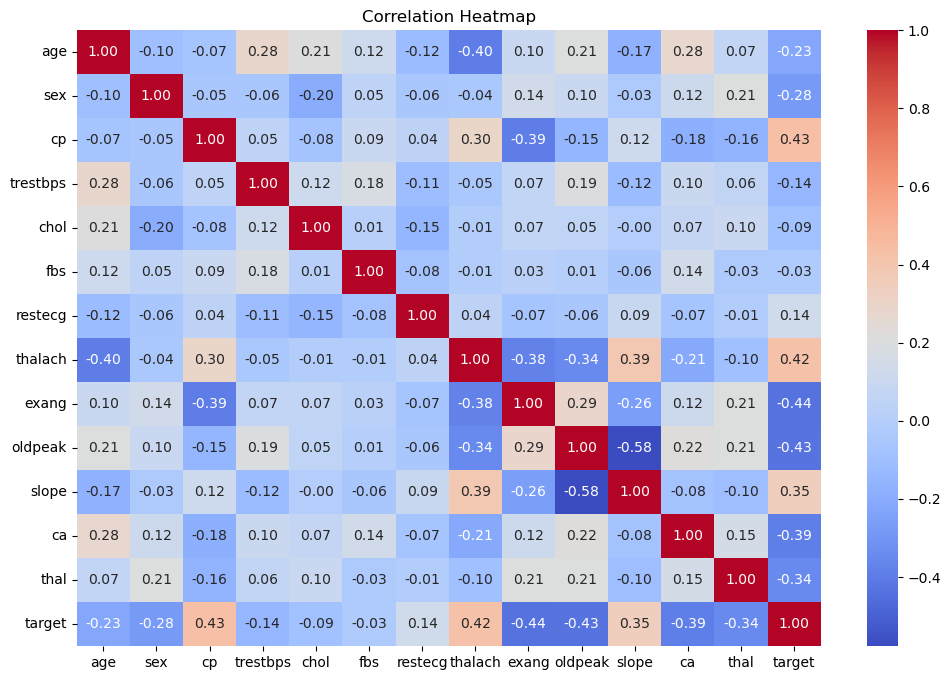

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


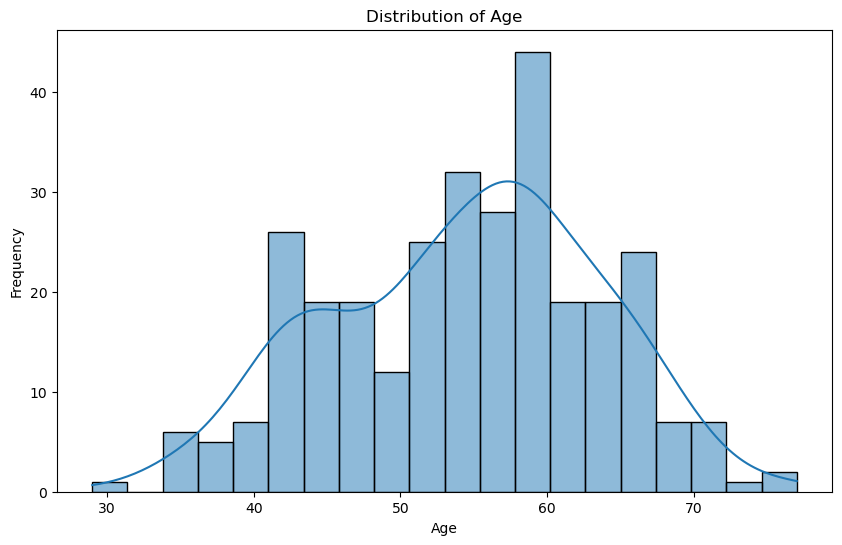

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


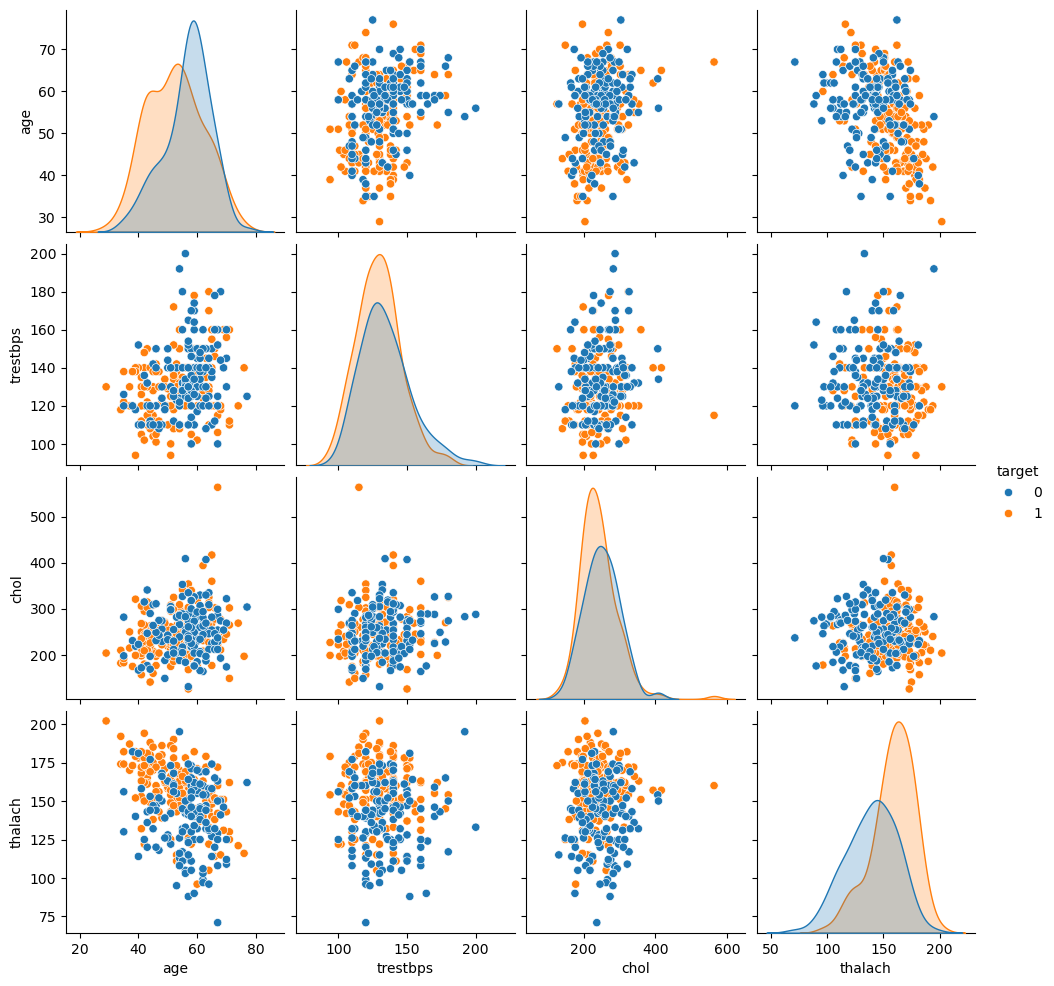

In [12]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')
plt.show()


In [39]:
features = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal'
]
target = 'target'

# Selecting X and y
X = df[features]
y = df[target]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

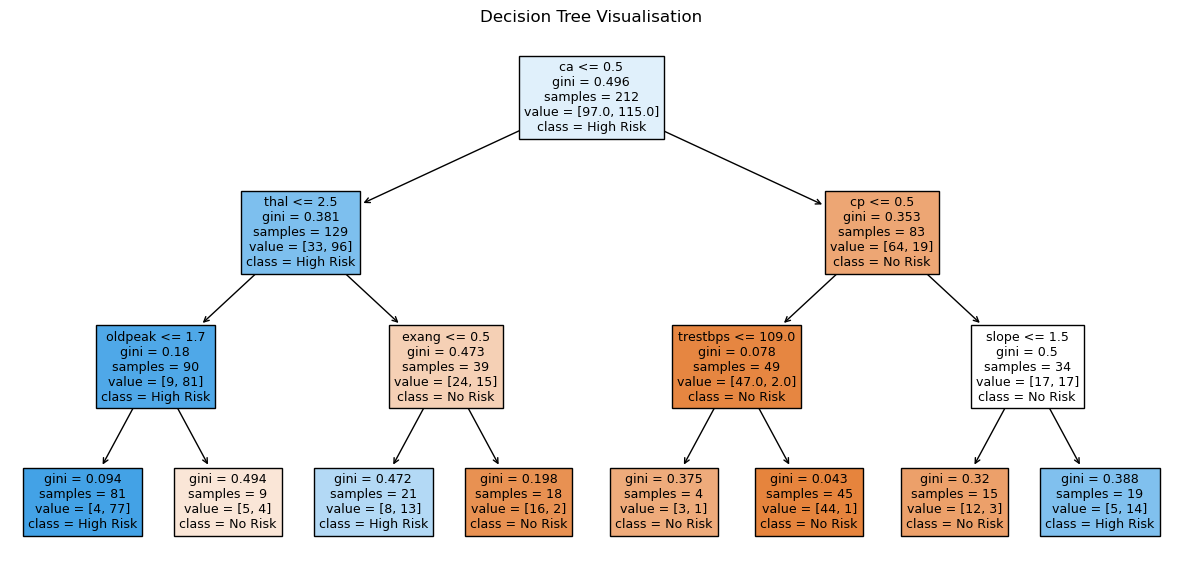

In [47]:
ig = plt.figure(figsize=(15,7))
plot_tree(dt_classifier, feature_names=features, class_names=['No Risk', 'High Risk'], filled=True)
plt.title("Decision Tree Visualisation")
plt.show()

In [75]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Le taux d'erreur est:", 1 - accuracy)  
print(f"Model Accuracy: {accuracy:.2f}")

Le taux d'erreur est: 0.23076923076923073
Model Accuracy: 0.77


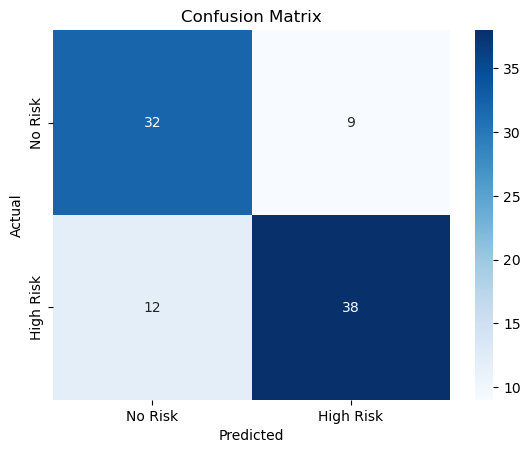

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'High Risk'], yticklabels=['No Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()